<a href="https://colab.research.google.com/github/Danilo-Carvalho-Antunes/fastaiOnCampus/blob/main/Lesson3_Danilo_Carvalh_Antunes_211039312.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Have or Have not Heart Diseases  ?
### Lesson 3 - Student 211039312
### Danilo Carvalho Antunes
### Github: Danilo-Carvalho-Antunes


# Introduction

*   The main objetive of it is to create a model of machine learning capable of predict if have heart diseases. To do this is necessary to use some techniques of deep learning.

*   It's made in jupyter, google Colab, Hugging Face and using Gradio



# Step 1 - downloading dependecies and the dataset

In [1]:
import pandas as pd

In [2]:
!pip3 install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

In [5]:
heart_disease = fetch_ucirepo(id=45)

In [6]:
X = heart_disease.data.features
y = heart_disease.data.targets

In [7]:
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

45
303
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


In [8]:
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

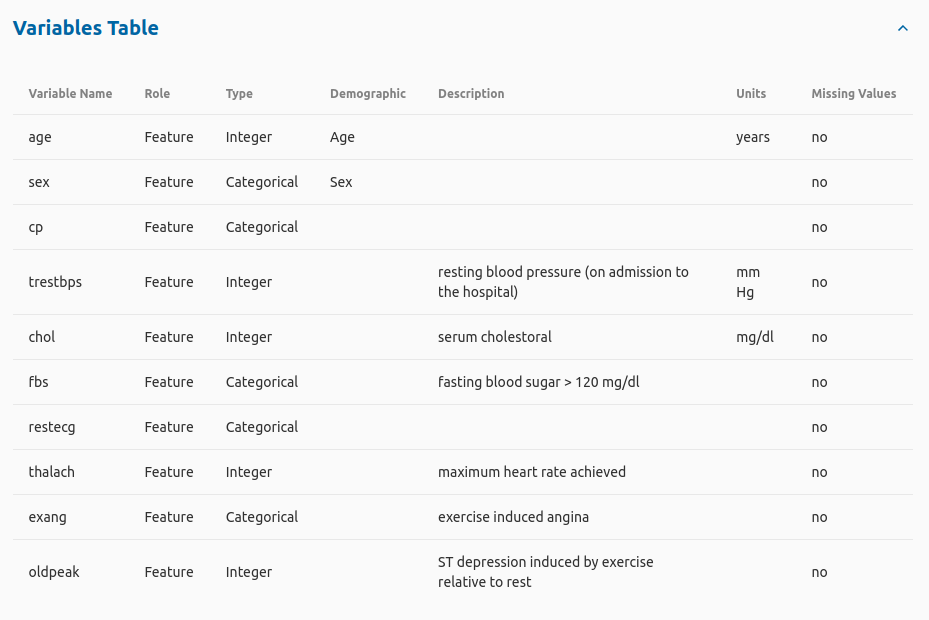

In [9]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.tabular.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.3 MB/s eta 0:00:00


In [13]:
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

In [17]:
!pip install fastai --upgrade

In [28]:
import fastai

url = "https://archive.ics.uci.edu/static/public/45/data.csv"
with open("data.csv", "wb") as f:
    f.write(requests.get(url).content)

# Step 2 - Training the model and making the DataBlock

In [35]:
doc(untar_data)

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
Download `url` using `FastDownload.get`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [70]:
path = Path('models')

In [72]:
df = pd.read_csv(path/'data.csv')

In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [74]:
df.shape

(303, 14)

In [75]:
df.nunique

<bound method DataFrame.nunique of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0  

In [76]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [77]:
procs = [FillMissing,Categorify]
dep_var = 'num'
cont,cat = cont_cat_split(df, 1,dep_var=dep_var) # o que é continuo e o que é categorico de forma automatica

In [78]:
dls=TabularDataLoaders.from_df(df,path,procs=procs,cat_names= cat,cont_names=cont,y_names=dep_var,bs=64)

In [79]:
dls.show_batch()

,ca_na,thal_na,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0.0
1,False,False,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
2,False,False,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
3,False,False,47.0,1.0,3.0,108.0,243.0,0.0,0.0,152.0,0.0,0.0,1.0,0.0,3.0,1.0
4,False,False,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0.0
5,False,False,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0.0
6,False,False,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,3.0
7,False,False,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,0.0
8,False,False,60.0,0.0,3.0,102.0,318.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,0.0
9,False,False,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1.0


In [82]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.455461,2.676172,0.533333,00:00
1,2.180379,1.614566,0.533333,00:00
2,1.951650,1.477993,0.533333,00:00


In [81]:
learn.show_results()

,ca_na,thal_na,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_pred
0,1.0,2.0,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,3.0,0.0,-0.572842
1,1.0,1.0,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0.0,0.591321
2,1.0,1.0,60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0,0.0,-0.906652
3,1.0,1.0,52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0.0,-0.817089
4,1.0,1.0,59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,1.0,0.247614
5,1.0,1.0,44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0.0,-0.101004
6,1.0,1.0,44.0,1.0,2.0,120.0,220.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0.0,-0.320205
7,1.0,1.0,60.0,1.0,4.0,130.0,253.0,0.0,0.0,144.0,1.0,1.4,1.0,1.0,7.0,1.0,1.331685
8,1.0,1.0,54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0,3.0,1.434691


In [83]:
learn.summary()

TabularModel (Input shape: 64 x 2)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 9          True      
Embedding                                 9          True      
Dropout                                                        
BatchNorm1d                               26         True      
____________________________________________________________________________
                     64 x 200            
Linear                                    3800       True      
ReLU                                                           
BatchNorm1d                               400        True      
____________________________________________________________________________
                     64 x 100            
Linear                                    20000      True      
ReLU                                                           
BatchNorm1d                               200

# Step 3 - Turning the Model into an Online Application

In [85]:
import os

os.makedirs('models', exist_ok=True)

learn.export('HeartDisease.pkl')

https://huggingface.co/spaces/fastaioncampus/HeartDiseases